In [6]:
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
import numpy as np
import os

In [20]:
# TEST SET 2 BEARING 1
final_table=pd.DataFrame()
bearing_no = 1
test_set = 2
path = r'D:\Bearing project Dataset\2nd_test\2nd_test'

def skewness(x):
    n= len(x)
    a = np.sum((x - np.mean(x))**3)/n
    b = np.std(x,ddof =1)**3
    return a/b

def kurtosis(x):
    n= len(x)
    a = np.sum((x - np.mean(x))**4)/n
    b = np.std(x,ddof =1)**4
    return a/b - 3
    
for filename in os.listdir(path):
    dataset = pd.read_csv(os.path.join(path, filename), sep='\t', header =None)
    datarr = np.array(dataset.iloc[:,bearing_no-1])
    temp = datarr
    feature_matrix = np.zeros((1,9))
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof=1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp**2))
    feature_matrix[0,5] = skewness(temp)
    feature_matrix[0,6] = kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    df= pd.DataFrame(feature_matrix)
    df.index = [filename[:-3]]
    final_table = pd.concat([final_table,df])

final_table
    


,0,1,2,3,4,5,6,7,8
2004.02.12.10.32,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,0.990533
2004.02.12.10.42,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,0.999436
2004.02.12.10.52,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,0.999493
2004.02.12.11.02,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,0.999606
2004.02.12.11.12,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,0.999555
...,...,...,...,...,...,...,...,...,...
2004.02.19.05.42,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,1.000017
2004.02.19.05.52,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,0.999977
2004.02.19.06.02,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,1.000018
2004.02.19.06.12,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,0.469494


In [24]:
final_table.columns = ['Max', 'Min', 'Mean', 'Standard Deviation', 'RMS', 'Skewness', 'Kurtosis', 'Crest Factor', 'Form Factor']
final_table.index = pd.to_datetime(final_table.index, format='%Y.%m.%d.%H.%M')
final_table = final_table.sort_index()
final_table.to_csv('Bearing_values_bearingno{}_testset{}.csv'.format(bearing_no,test_set))
final_table

,Max,Min,Mean,Standard Deviation,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,0.990533
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,0.999436
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,0.999493
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,0.999606
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,0.999555
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,1.000017
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,0.999977
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,1.000018
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,0.469494


In [28]:
# TEST SET 2 BEARING 2
final_table1=pd.DataFrame()
bearing_no = 2
test_set = 2
path = r'D:\Bearing project Dataset\2nd_test\2nd_test'
    
for filename in os.listdir(path):
    dataset = pd.read_csv(os.path.join(path, filename), sep='\t', header =None)
    datarr = np.array(dataset.iloc[:,bearing_no-1])
    temp = datarr
    feature_matrix = np.zeros((1,9))
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof=1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp**2))
    feature_matrix[0,5] = skewness(temp)
    feature_matrix[0,6] = kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    df= pd.DataFrame(feature_matrix)
    df.index = [filename[:-3]]
    final_table1 = pd.concat([final_table1,df])

final_table1

final_table1.columns = ['Max', 'Min', 'Mean', 'Standard Deviation', 'RMS', 'Skewness', 'Kurtosis', 'Crest Factor', 'Form Factor']
final_table1.index = pd.to_datetime(final_table1.index, format='%Y.%m.%d.%H.%M')
final_table1 = final_table1.sort_index()
final_table1.to_csv('Bearing_values_bearingno{}_testset{}.csv'.format(bearing_no,test_set))
final_table1

,Max,Min,Mean,Standard Deviation,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.464,-0.513,-0.012695,0.090056,0.090944,0.126906,0.506458,5.102047,0.990233
2004-02-12 10:42:00,0.457,-0.481,-0.002561,0.093386,0.093419,0.070083,0.252696,4.891944,0.999649
2004-02-12 10:52:00,0.491,-0.503,-0.001695,0.093705,0.093718,0.096575,0.310466,5.239127,0.999861
2004-02-12 11:02:00,0.569,-0.474,-0.002393,0.092919,0.092947,0.105826,0.235025,6.121762,0.999693
2004-02-12 11:12:00,0.452,-0.486,-0.001559,0.095338,0.095348,0.097958,0.225994,4.740531,0.999891
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,1.118,-0.884,-0.000838,0.218298,0.218294,0.641960,2.452206,5.121522,1.000017
2004-02-19 05:52:00,0.908,-0.637,-0.000910,0.170819,0.170817,0.464408,0.910876,5.315634,1.000010
2004-02-19 06:02:00,0.891,-0.752,-0.001632,0.193639,0.193641,0.386833,0.330302,4.601296,0.999989
2004-02-19 06:12:00,0.007,0.000,0.003731,0.001490,0.004018,-0.289618,-1.871150,1.742236,0.370754


In [29]:
# TEST SET 2 BEARING 3
final_table1=pd.DataFrame()
bearing_no = 3
test_set = 2
path = r'D:\Bearing project Dataset\2nd_test\2nd_test'
    
for filename in os.listdir(path):
    dataset = pd.read_csv(os.path.join(path, filename), sep='\t', header =None)
    datarr = np.array(dataset.iloc[:,bearing_no-1])
    temp = datarr
    feature_matrix = np.zeros((1,9))
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof=1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp**2))
    feature_matrix[0,5] = skewness(temp)
    feature_matrix[0,6] = kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    df= pd.DataFrame(feature_matrix)
    df.index = [filename[:-3]]
    final_table1 = pd.concat([final_table1,df])

final_table1

final_table1.columns = ['Max', 'Min', 'Mean', 'Standard Deviation', 'RMS', 'Skewness', 'Kurtosis', 'Crest Factor', 'Form Factor']
final_table1.index = pd.to_datetime(final_table1.index, format='%Y.%m.%d.%H.%M')
final_table1 = final_table1.sort_index()
final_table1.to_csv('Bearing_values_bearingno{}_testset{}.csv'.format(bearing_no,test_set))
final_table1

,Max,Min,Mean,Standard Deviation,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,1.023,-0.911,-0.014541,0.108436,0.109404,0.204825,3.212468,9.350652,0.991152
2004-02-12 10:42:00,0.752,-0.681,-0.002461,0.109792,0.109817,-0.023852,1.394821,6.847735,0.999773
2004-02-12 10:52:00,0.933,-0.786,-0.001595,0.109852,0.109861,0.056557,2.639397,8.492546,0.999919
2004-02-12 11:02:00,1.016,-0.935,-0.003148,0.110624,0.110667,0.033548,2.682224,9.180734,0.999620
2004-02-12 11:12:00,0.745,-0.771,-0.001158,0.107502,0.107506,-0.002892,1.577948,6.929872,0.999966
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,0.686,-0.769,-0.001911,0.170570,0.170577,-0.011975,-0.098321,4.021649,0.999962
2004-02-19 05:52:00,0.764,-0.725,-0.001348,0.177877,0.177878,0.111051,-0.319468,4.295083,0.999996
2004-02-19 06:02:00,0.845,-0.784,-0.001365,0.187405,0.187405,0.247077,-0.135942,4.508940,0.999998
2004-02-19 06:12:00,0.007,0.000,0.003656,0.001496,0.003950,-0.196107,-1.935522,1.772075,0.378802


In [40]:
# TEST SET 2 BEARING 4
final_table1=pd.DataFrame()
bearing_no = 4
test_set = 2
path = r'D:\Bearing project Dataset\2nd_test\2nd_test'
    
for filename in os.listdir(path):
    dataset = pd.read_csv(os.path.join(path, filename), sep='\t', header =None)
    datarr = np.array(dataset.iloc[:,bearing_no-1])
    temp = datarr
    feature_matrix = np.zeros((1,9))
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof=1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp**2))
    feature_matrix[0,5] = skewness(temp)
    feature_matrix[0,6] = kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    df= pd.DataFrame(feature_matrix)
    df.index = [filename[:-3]]
    final_table1 = pd.concat([final_table1,df])

final_table1

final_table1.columns = ['Max', 'Min', 'Mean', 'Standard Deviation', 'RMS', 'Skewness', 'Kurtosis', 'Crest Factor', 'Form Factor']
final_table1.index = pd.to_datetime(final_table1.index, format='%Y.%m.%d.%H.%M')
final_table1 = final_table1.sort_index()
final_table1.to_csv('Bearing_values_bearingno{}_testset{}.csv'.format(bearing_no,test_set))
final_table1

,Max,Min,Mean,Standard Deviation,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.193,-0.264,-0.010026,0.053168,0.054103,-0.022078,0.065660,3.567239,-5.396329
2004-02-12 10:42:00,0.249,-0.229,-0.003784,0.055974,0.056101,0.001582,0.107236,4.438435,-14.827018
2004-02-12 10:52:00,0.354,-0.334,-0.003485,0.056038,0.056145,0.070444,0.256918,6.305078,-16.108911
2004-02-12 11:02:00,0.513,-0.525,-0.003741,0.056686,0.056807,-0.036324,0.805818,9.030509,-15.186020
2004-02-12 11:12:00,0.244,-0.212,-0.002703,0.056778,0.056841,0.019006,0.138647,4.292680,-21.032042
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,0.542,-0.544,-0.002939,0.148326,0.148351,-0.051945,-0.093570,3.653494,-50.473985
2004-02-19 05:52:00,0.527,-0.449,-0.003315,0.116586,0.116630,0.119884,0.259273,4.518571,-35.180992
2004-02-19 06:02:00,0.625,-0.479,-0.003311,0.130544,0.130582,0.167966,0.696806,4.786252,-39.440269
2004-02-19 06:12:00,0.005,-0.002,0.001786,0.001204,0.002154,0.656632,1.652267,2.321622,1.206167


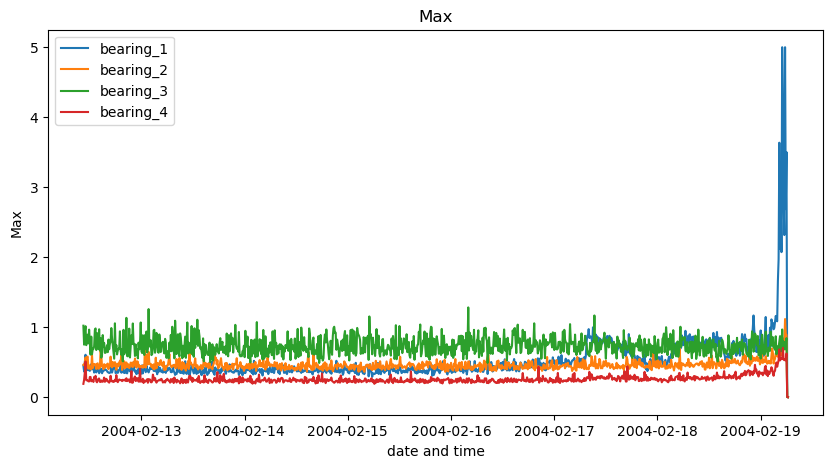

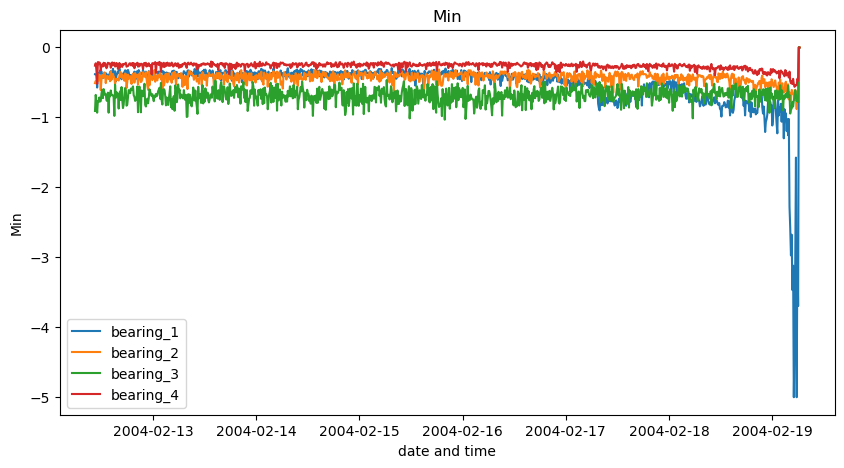

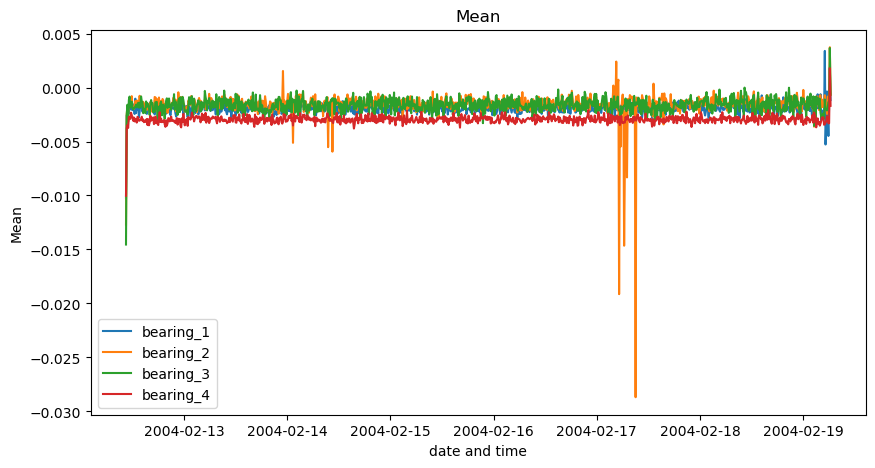

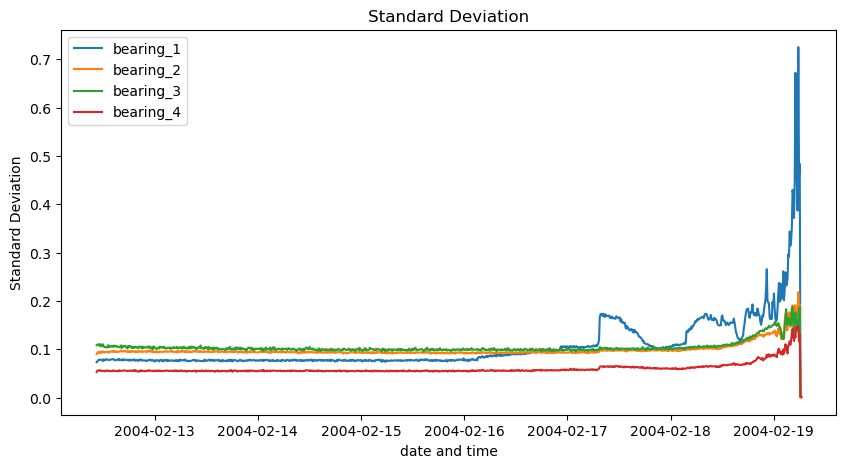

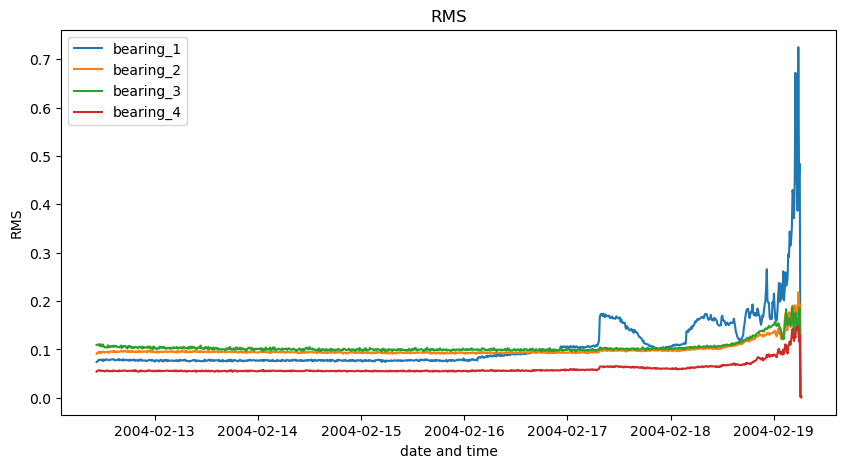

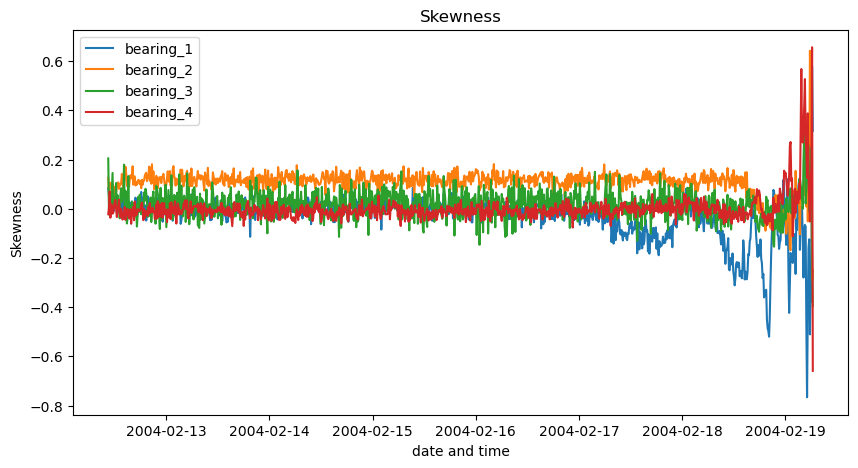

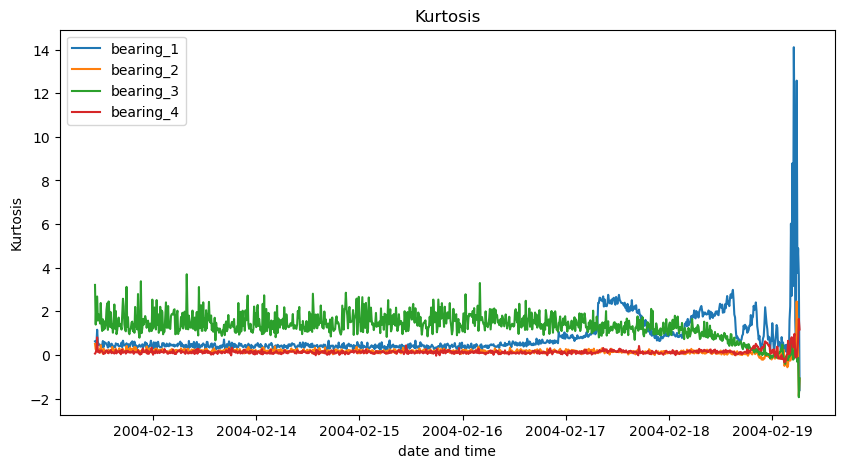

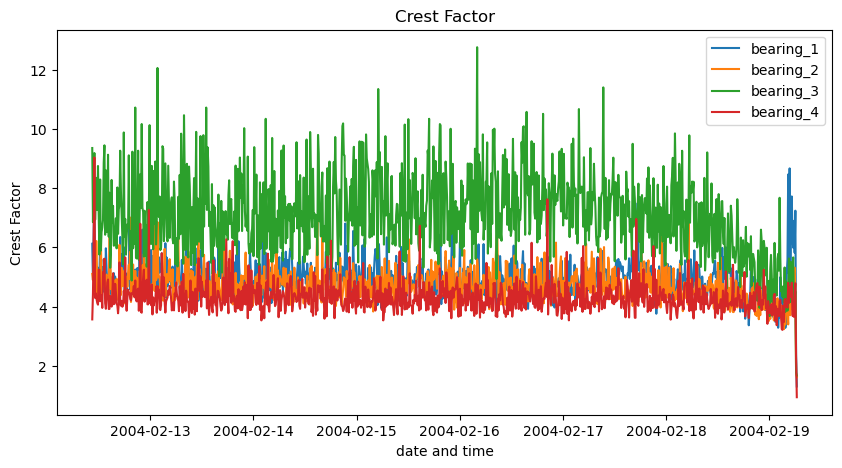

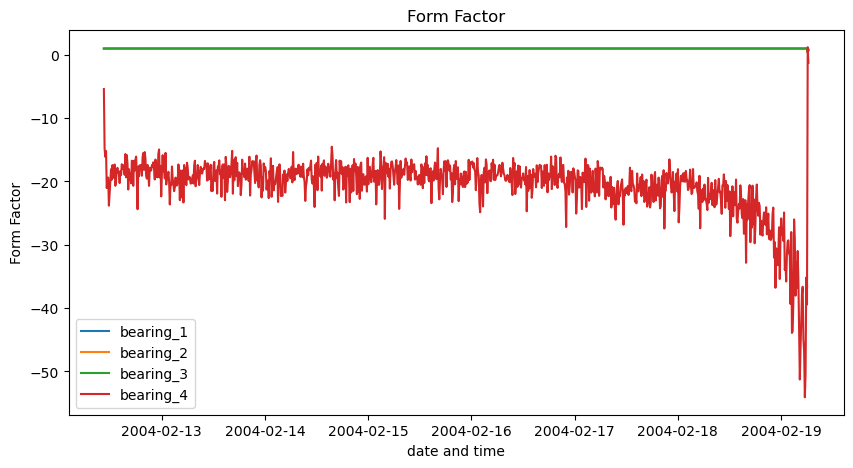

In [41]:
df1 = pd.read_csv("Bearing_values_bearingno1_testset2.csv", index_col = 'Unnamed: 0')
df2 = pd.read_csv("Bearing_values_bearingno2_testset2.csv", index_col = 'Unnamed: 0')
df3 = pd.read_csv("Bearing_values_bearingno3_testset2.csv", index_col = 'Unnamed: 0')
df4 = pd.read_csv("Bearing_values_bearingno4_testset2.csv", index_col = 'Unnamed: 0')
df1.index = pd.to_datetime(df1.index)
for col in (df1.columns):
    plt.figure(figsize=(10,5))
    plt.plot(df1.index,df1[col])
    plt.plot(df1.index,df2[col])
    plt.plot(df1.index,df3[col])
    plt.plot(df1.index,df4[col])
    plt.legend(['bearing_1','bearing_2','bearing_3','bearing_4'])
    plt.xlabel('date and time')
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [39]:
df=df1['2004-02-18 00:32:00':'2004-02-19 06:22:00']
fault = []
for i in range(0,len(df)):
    fault.append('Outer Race')
df['Fault']=fault
df

C:\Users\haris\AppData\Local\Temp\ipykernel_9104\2912005000.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fault']=fault


,Max,Min,Mean,Standard Deviation,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2004-02-18 00:32:00,0.481,-0.645,-0.002109,0.108896,0.108914,0.043103,1.006777,4.416327,0.999837,Outer Race
2004-02-18 00:42:00,0.508,-0.537,-0.002089,0.107409,0.107426,0.026895,0.906887,4.728821,0.999835,Outer Race
2004-02-18 00:52:00,0.554,-0.540,-0.001542,0.108719,0.108727,0.080662,1.060355,5.095329,0.999924,Outer Race
2004-02-18 01:02:00,0.591,-0.461,-0.002320,0.110181,0.110203,0.047596,1.030171,5.362826,0.999803,Outer Race
2004-02-18 01:12:00,0.498,-0.630,-0.002595,0.109821,0.109849,-0.018425,0.916053,4.533508,0.999745,Outer Race
...,...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,1.000017,Outer Race
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,0.999977,Outer Race
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,1.000018,Outer Race
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,0.469494,Outer Race


In [43]:
df.to_csv('Outer_Race_Fault_Set2.csv', index= False)

In [46]:
bearing_no=1
test_no=2
cret = pd.read_csv("Bearing_values_bearingno1_testset2.csv",index_col='Unnamed: 0')
starting = np.floor(len(cret)*.21)
starting

206.0